In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load cleaned dataset from Stage 7
data_path = Path("../data/processed/IYR_cleaned_project.csv")
df = pd.read_csv(data_path)
df.head()

,Date,Close,High,Low,Open,Volume,daily_return
0,2022-01-04,104.979668,105.98347045673019,104.84278388218969,105.47244509923952,9363000,-0.001909
1,2022-01-05,101.867874,104.8610416475952,101.79487549400208,104.71503042018671,12110000,-0.029642
2,2022-01-06,101.849625,102.32414719106457,100.84582182871513,101.96825353255834,7920600,-0.000179
3,2022-01-07,101.165215,101.86787442636896,100.88232648743846,101.5667384528561,7883300,-0.006720
4,2022-01-10,100.654190,100.68156542838568,99.33098940788028,100.60855981382895,10109200,-0.005051


In [2]:
# Basic statistical summary
df.describe()

,Close,daily_return
count,496.000000,497.000000
mean,84.166116,-0.000314
std,7.530544,0.013258
min,70.219551,-0.042372
25%,78.941669,-0.008389
50%,82.377026,-0.001033
75%,88.718624,0.008016
max,104.979668,0.039843


In [3]:
df.isna().sum()

Date            1
Close           1
High            0
Low             0
Open            0
Volume          0
daily_return    0
dtype: int64

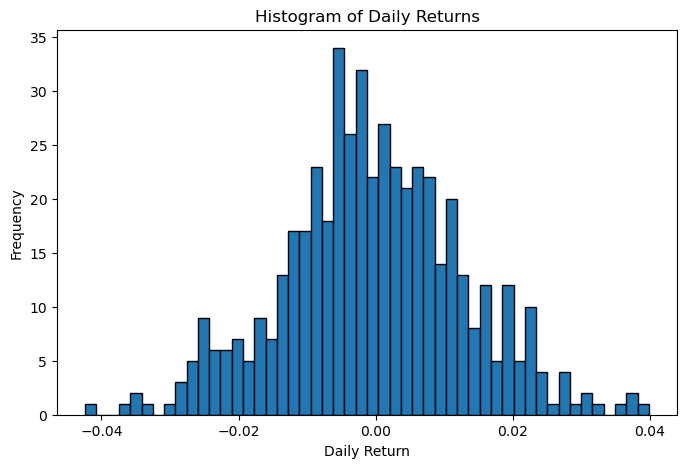

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df["daily_return"], bins=50, edgecolor="k")
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

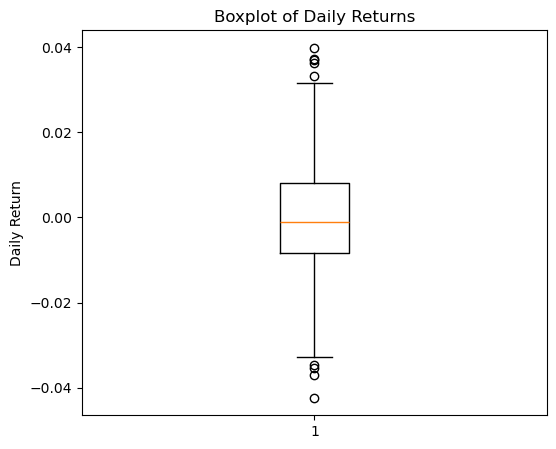

In [5]:
plt.figure(figsize=(6,5))
plt.boxplot(df["daily_return"].dropna(), vert=True)
plt.title("Boxplot of Daily Returns")
plt.ylabel("Daily Return")
plt.show()

In [7]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print(df.columns.tolist())
df.head(2)

['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'daily_return']


,Date,Close,High,Low,Open,Volume,daily_return
0,2022-01-04,104.979668,105.98347045673019,104.84278388218969,105.47244509923952,9363000,-0.001909
1,2022-01-05,101.867874,104.8610416475952,101.79487549400208,104.71503042018671,12110000,-0.029642


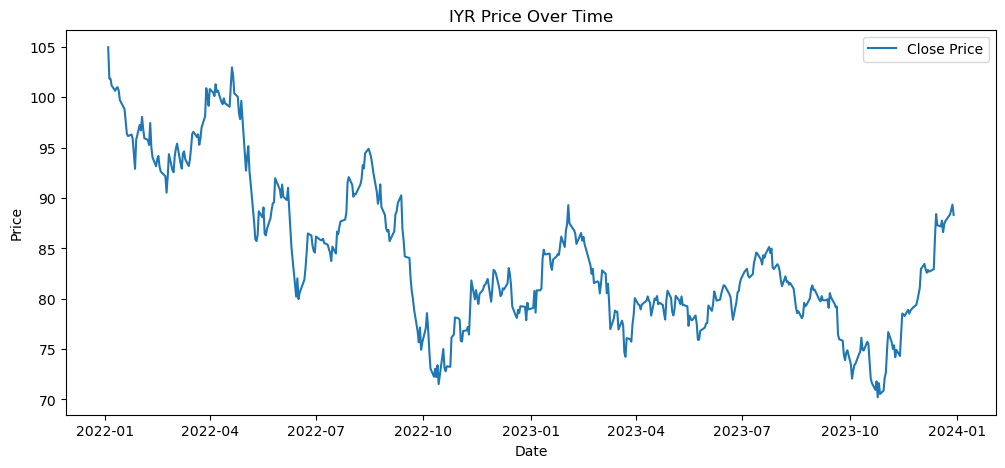

In [8]:
# Pick the price column that exists
price_col = "Adj Close" if "Adj Close" in df.columns else (
    "Close" if "Close" in df.columns else None
)

if price_col is None:
    raise ValueError(f"No price column found. Columns are: {df.columns.tolist()}")

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df[price_col], label=f"{price_col} Price")
plt.title("IYR Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()